# Table of Contents
* [Introduction](#Introduction)
* [Define the Problem](#define-problem)
* [Prepare the Data](#data-preparation)
    * [Data Visuals](#init-visuals)
    * [train_test_split](#train-test-split)
    * [cross_validation](#cross-validation)
* [Select and Evaluate Algorithms](#algorithm)
    * [Decision Tree](#dec-tree)
    * [Logistic Regression](#logreg)
    * [Support Vector Machine](#svm)
    * [Naive Bayes](#naive-bayes)
* [Conclusion](#conclusion)

<script type='text/javascript'>
  window.smartlook||(function(d) {
    var o=smartlook=function(){ o.api.push(arguments)},h=d.getElementsByTagName('head')[0];
    var c=d.createElement('script');o.api=new Array();c.async=true;c.type='text/javascript';
    c.charset='utf-8';c.src='https://rec.smartlook.com/recorder.js';h.appendChild(c);
    })(document);
    smartlook('init', 'cade59771a0314d813770d89baee09ec147cc536');
</script>

<a id='Introduction'></a>
# Introduction

Hola fellow Kaggler! A brief introduction regarding this notebook:
* This is about the *Iris Flower Dataset* (other reference: https://en.wikipedia.org/wiki/Iris_flower_data_set)
* According to wikipedia, there are 300 species of Iris genus. In our dataset, we only have three, each having 50 samples -- thus, having a total of 150 sample records.
* There are 5 column attributes, namely: Petal length (cm), petal width (cm), sepal length (cm), sepal width (cm), and class.
* I'll be using the common classification algorithms, and will be evaluating afterwards on which is the best algorithm to use base on various classification metric scores.

<a id='define-problem'></a>
# Define the Problem     

What do we want to happen here? 

**Given an Iris flower dataset, we want to CLASSIFY what type of 'Iris species' do we have, basing only on its SEPAL and PETAL sizes.**

But hold on, what do we mean by 'sepal' and 'petal'?

Boys and girls, below is a picture of a flower showing its anatomy. 

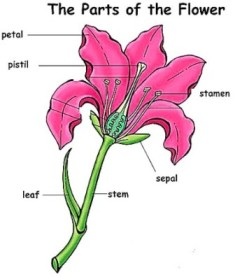

What we have here is an Iris flower dataset, so what does an Iris flower generally look like? Below is a quick image search of it.

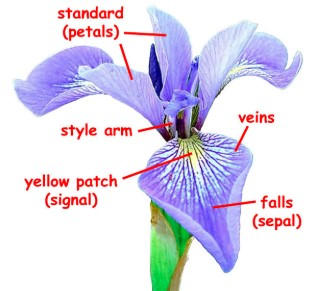

** image from USDA Forest Service*

This Iris genus looks new to me. In comparison to most flowers that I've seen in my life (I only saw a few, not a flower person tbh), it seems that the sample above has its 'sepals' wider than its 'petals', and the sizes vary depending on specific Iris species.

Now with our dataset in hand, we are given only 4 flower attributes: the length and width of sepals and petals in centimeters. Fortunately, having the sepal-petal length-width is enough for us to check what kind of Iris flower we are looking at.

<a id='data-preparation'></a>
# Prepare the Data

In [ ]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline 

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filevar = os.path.join(dirname, filename)

# import dataset
try: 
    df = pd.read_csv(filevar)
    print('File loading - Success!')
except:
    print('File loading - Failed!')

In [ ]:
# sample dataframe content
df

As you can see on the above table, the 'species' (last) column identifies what type of Iris flower is it depending on the sepal-petal length-width observation.

In [ ]:
df.info()

There are no null values in our dataset, so no need to tidy up the data.

Let's create some visualizations so the datapoints are somewhat pleasing to look at.
<a id='init-visuals'></a>

In [ ]:
sepal = sns.FacetGrid(df,col='species')
sepal.map(plt.scatter,'sepal_width','sepal_length',alpha=0.7)

petal = sns.FacetGrid(df,col='species')
petal.map(plt.scatter,'petal_width','petal_length',alpha=0.7)

Below are sample images of setosa, versicolor, and virginica. IMO, the graphs are in sync with the pictures.

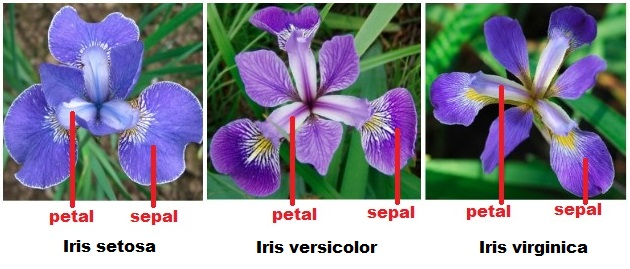

If we try to compare and contrast each attribute to one another, it will look like this:

In [ ]:
sns.pairplot(df,hue='species')

For each plot, there are distinct seggregations, few of which are quite overlapping with each other. Will try to classify the flower type base on these features. 

For now, I'll be using 2 methods for choosing the training and testing data:
* [sklearn's train-test-split; and](#train-test-split)
* [sklearn's cross validation;](#cross-validation)

I'll try to use these 2 methods in all of my supervised learning projects so as to familiarize myself with the syntax and usage. I'll do the same for the algorithms, hence this post will be lengthy, so please bear with me. :-) 

<a id='train-test-split'></a>
**TRAIN_TEST_SPLIT**



In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='species',axis=1)
y = df.species

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) # 20% of samples reserved for test
print(X_train.shape)  # 120 records out of 150 will be the training data
print(X_test.shape)   #  30 records out of 150 will be the testing  data

<a id='cross-validation'></a>
**CROSS_VALIDATION**

For cross validation method, I'll be defining a function here, but will proceed to use it later because the method already returns an array of accuracy metric scores, unlike in train_test_split that returns the assigned train-test data instead. For more information, refer to [sklearn.model_selection.cross_val_score page](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#).

In [ ]:
from sklearn.model_selection import cross_val_score

def crossValScore(algorithm,X,y):
    """ Input: classifier algorithm, X features, y target
        Returns: mean accuracy of the classifier algorithm via cross validation scoring
    """
    clf = algorithm
    return cross_val_score(clf,X,y,cv=10,scoring='accuracy').mean() 

<a id='algorithm'></a>
# Select and Evaluate Algorithms

For this section, I'll be trying out these classification algorithms and fit it in our Iris dataset.
* Decision Tree
* Logistic Regression
* Support Vector Machine
* Naive Bayes 

After which, I'll be trying out these classification metric methods to evaluate which algorithm scores more accurately.
* Classification Report
* Confusion Matrix
* Classification Accuracy

I'll be doing this sequence as follows: Define -> Fit -> Predict -> Evaluate. 

From there, we'll see and choose which algorithm is the best to use in this case.

<a id='dec-tree'></a>
**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dec_tree_clf = DecisionTreeClassifier()

# fit and predict using train test data
dec_tree_clf.fit(X_train,y_train)
y_pred = dec_tree_clf.predict(X_test)

# evaluate prediction
print('CLF REPORT:\n',classification_report(y_test,y_pred))
print('\nCONFUSION MATRIX:\n',confusion_matrix(y_test,y_pred))
print('\nTTS ACCURACY:\n',accuracy_score(y_test,y_pred))

# fit, predict and evaluate using cross validation
dec_tree_score = crossValScore(dec_tree_clf,X,y)
print('\nCV ACCURACY:\n',dec_tree_score)

<a id='logreg'></a>
**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_clf = LogisticRegression(solver='liblinear')

# fit and predict using train test data 
log_reg_clf.fit(X_train,y_train)
y_pred = log_reg_clf.predict(X_test)

# evaluate prediction
print('CLF REPORT:\n',classification_report(y_test,y_pred))
print('\nCONFUSION MATRIX:\n',confusion_matrix(y_test,y_pred))
print('\nTTS ACCURACY:\n',accuracy_score(y_test,y_pred))

# fit, predict and evaluate using cross validation
log_reg_score = crossValScore(log_reg_clf,X,y)
print('\nCV ACCURACY:\n',log_reg_score)

<a id='svm'></a>
**SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()

# fit and predict using train test data 
svm_clf.fit(X_train,y_train)
y_pred = svm_clf.predict(X_test)

# evaluate prediction
print('CLF REPORT:\n',classification_report(y_test,y_pred))
print('\nCONFUSION MATRIX:\n',confusion_matrix(y_test,y_pred))
print('\nTTS ACCURACY:\n',accuracy_score(y_test,y_pred))

# fit, predict and evaluate using cross validation
svm_score = crossValScore(svm_clf,X,y)
print('\nCV ACCURACY:\n',svm_score)

<a id='naive-bayes'></a>
**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()

# fit and predict using train test data
nb_clf.fit(X_train,y_train)
y_pred = nb_clf.predict(X_test)

# evaluate prediction
print('CLF REPORT:\n',classification_report(y_test,y_pred))
print('\nCONFUSION MATRIX:\n',confusion_matrix(y_test,y_pred))
print('\nTTS ACCURACY:\n',accuracy_score(y_test,y_pred))

# fit, predict and evaluate using cross validation
nb_score = crossValScore(nb_clf,X,y)
print('\nCV ACCURACY:\n',nb_score)

<a id='conclusion'></a>
# Conclusion

Base on the results, the highest accuracy that we got is 0.97 from **SVM model** using data **cross validation**.

Here is a sample prediction if a new value is entered.

In [ ]:
X_new = pd.DataFrame(np.array([[5.8,3.5,1.4,0.4],[6.9,3.0,4.8,1.7],[7.6,3.0,6.6,2.5]]),columns=list(X.columns))

# new dataset to be predicted
X_new

In [ ]:
# new species prediction result
X_new['species'] = svm_clf.predict(X_new)
X_new

That's all folks for the Iris flower visualization and classification. Do leave a note for feedback and improvement. Thank you for reading and spending some time on this kernel. :-)